# Modelando os tópicos da RBEF ao longo do tempo usando Latent Dirichlet Allocation 

## Imports


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
from multiprocessing import Pool

import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

from utils.pre_processing import tokenizer, html_to_text
from utils.model import add_bigram, create_dictionary, create_corpus
from utils.model import ModelLDA
from utils.plots import plot_frequent_words

## Leitura do banco de dados

In [3]:
df = pd.read_feather('scielo_dataset.feather')

# Tokenizaçao e Lemmetização

In [4]:
with Pool() as pool:
    # limpa o html dos textos.
    textos = list(tqdm(pool.imap(html_to_text, df['texto_html']), total=len(df)))
    
with Pool() as pool:
    # tokeniza e lemmetiza os textos.
    documentos = list(tqdm(pool.imap(tokenizer, textos), total=len(textos)))

  0%|          | 0/1664 [00:00<?, ?it/s]

  0%|          | 0/1664 [00:00<?, ?it/s]

## Bigram e criação do dicionário

In [5]:
add_bigram(documentos, min_count=10)

In [6]:
dicionario_sem_filtro = create_dictionary(documentos, filtrar=False)
dicionario = create_dictionary(documentos, n_abaixo=30, n_acima=0.5)

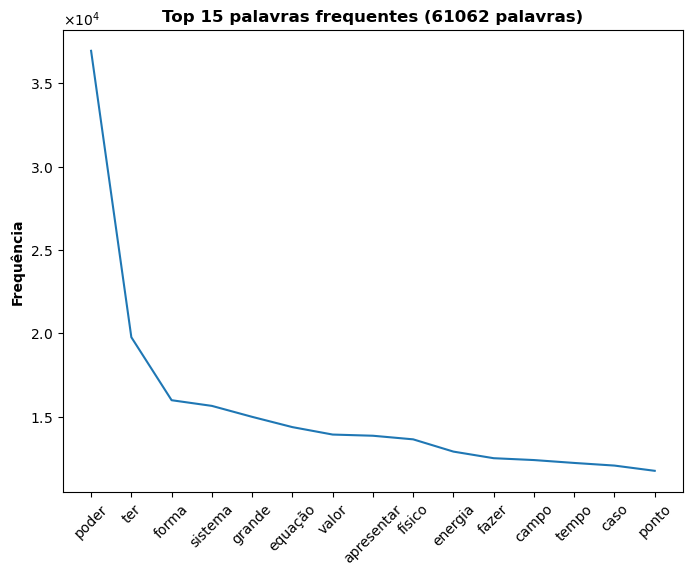

In [7]:
plot_frequent_words(dicionario_sem_filtro, filename='dicionario_completo.png')

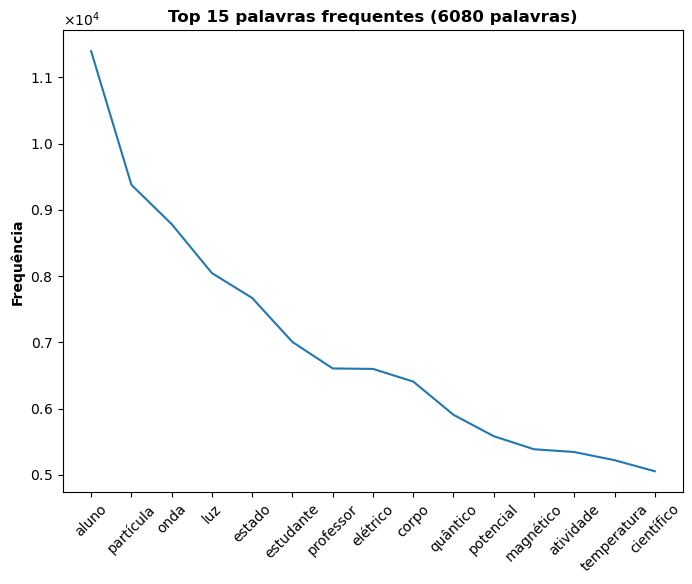

In [8]:
plot_frequent_words(dicionario, filename='dicionario_filtro.png')

In [9]:
corpus = create_corpus(dicionario, documentos)

In [10]:
lda = ModelLDA(corpus, dicionario, chunksize=2000, iterations=25, passes=50)

In [14]:
model = lda.run(12)

In [15]:
model.print_topics()

[(0,
  '0.021*"corpo" + 0.006*"centro" + 0.006*"planeta" + 0.006*"sol" + 0.005*"lua" + 0.005*"ação" + 0.005*"natureza" + 0.005*"parecer" + 0.004*"século" + 0.004*"objeto"'),
 (1,
  '0.026*"temperatura" + 0.015*"átomo" + 0.012*"calor" + 0.012*"molécula" + 0.011*"rede" + 0.009*"gás" + 0.009*"entropia" + 0.009*"térmico" + 0.008*"radiação" + 0.007*"equilíbrio"'),
 (2,
  '0.018*"quântico" + 0.011*"potencial" + 0.010*"operador" + 0.007*"matriz" + 0.007*"partícula" + 0.007*"clássico" + 0.006*"onda" + 0.006*"parâmetro" + 0.006*"probabilidade" + 0.006*"integral"'),
 (3,
  '0.024*"estrela" + 0.023*"solar" + 0.012*"sol" + 0.011*"universo" + 0.010*"radiação" + 0.010*"região" + 0.009*"planeta" + 0.009*"atmosfera" + 0.008*"escala" + 0.008*"temperatura"'),
 (4,
  '0.016*"ciência" + 0.014*"científico" + 0.009*"livro" + 0.008*"pesquisa" + 0.008*"professor" + 0.006*"texto" + 0.006*"curso" + 0.006*"formação" + 0.004*"cientista" + 0.004*"histórico"'),
 (5,
  '0.048*"partícula" + 0.021*"interação" + 0.016*

In [11]:
df["nova_seção"].value_counts(normalize=True)*100

artigos gerais                         48.497596
pesquisa em ensino de física           14.182692
produtos e materiais didáticos         12.139423
história da física e ciências afins     9.314904
outros                                  8.954327
seções especiais                        5.949519
SEM CATEGORIA                           0.961538
Name: nova_seção, dtype: float64